In [1]:
import torch
import numpy as np
from torch.utils.data import DataLoader

from attrbench.evaluation.independent import sensitivity_n
from attrbench.lib import PixelMaskingPolicy
from experiments.lib.util import get_ds_model, get_mask_range, get_methods
from experiments.test.util import imshow, attrshow, show_img_attrs

# Initialization and parameters

In [2]:
BATCH_SIZE = 4
DATASET = "MNIST"
MODEL = "CNN"
METHOD = "Gradient"
N_SUBSETS = 100

device = "cuda" if torch.cuda.is_available() else "cpu"
dataset, model = get_ds_model(DATASET, MODEL)
methods = get_methods(model, aggregation_fn="avg", normalize=True, methods=[METHOD],
                      batch_size=BATCH_SIZE, sample_shape=dataset.sample_shape[-2:])
method = methods[METHOD]
pmp = PixelMaskingPolicy(0.)
model.to(device)
for param in model.parameters():
    param.requires_grad = False
model.eval()
mask_range = get_mask_range(DATASET)

# Run Sensitivity-n

In [3]:
batch, labels = next(iter(DataLoader(dataset, BATCH_SIZE, num_workers=4, shuffle=True)))
batch = batch.to(device)
labels = labels.to(device)
sens_n, debug_data = sensitivity_n(batch, labels, model, method,
                                    mask_range[1:], N_SUBSETS, pmp, debug_mode=True)

/home/arne/Documents/PhD/projects/benchmark/venv/lib/python3.8/site-packages/captum/attr/_utils/gradient.py:31: UserWarning: Input Tensor 0 did not already require gradients, required_grads has been set automatically.
  warnings.warn(


# Plot results

## Plot the original samples and their attributions

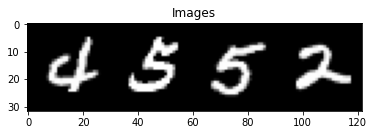

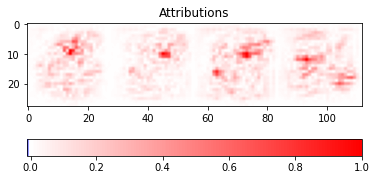

In [4]:
show_img_attrs(dataset.denormalize(batch), debug_data["attrs"])

## Plot perturbed samples and values for each perturbation step

n: 25


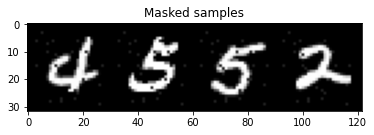

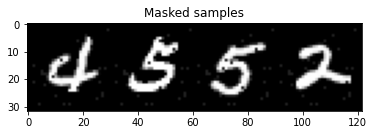

n: 50


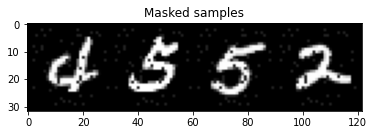

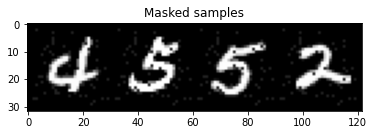

n: 75


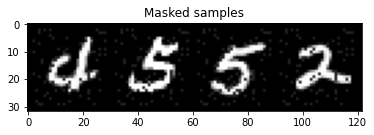

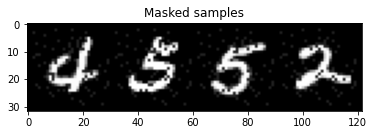

n: 100


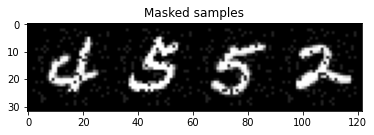

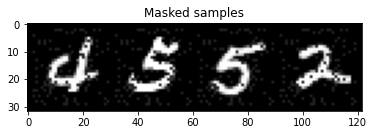

n: 125


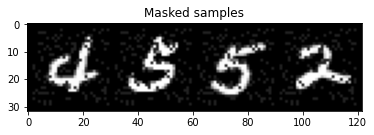

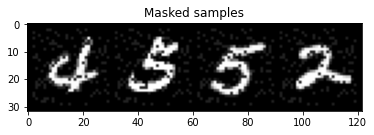

n: 150


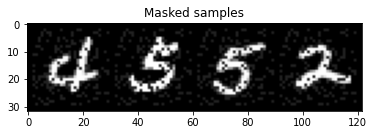

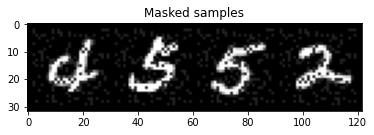

n: 175


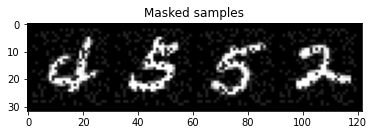

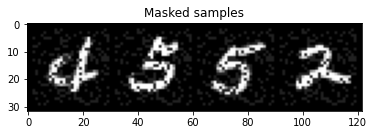

n: 200


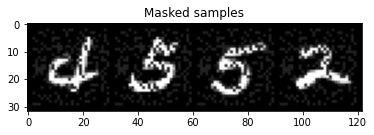

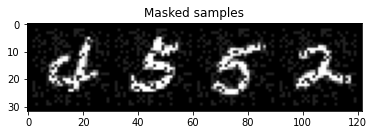

n: 225


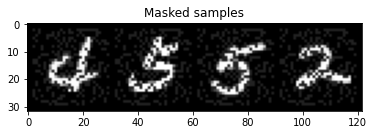

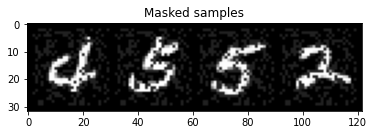

n: 250


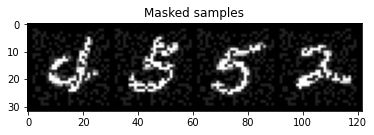

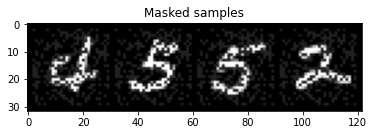

n: 275


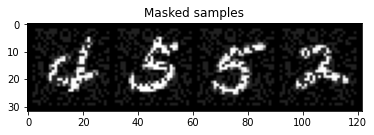

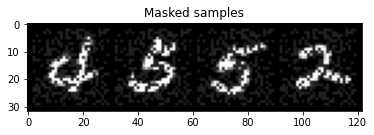

n: 300


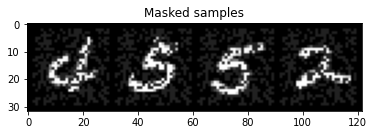

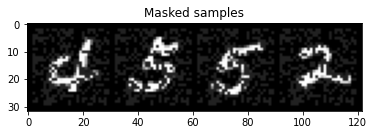

n: 325


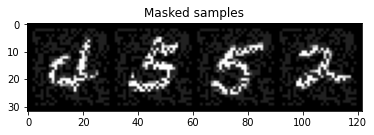

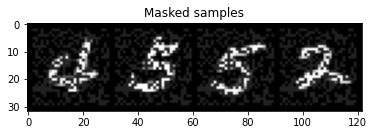

n: 350


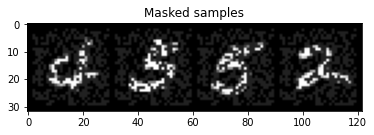

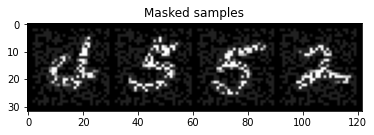

n: 375


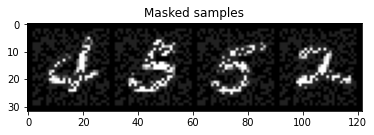

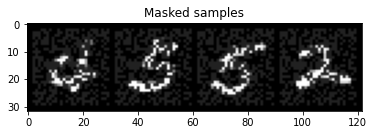

In [5]:
for n_idx, n_data in enumerate(debug_data["pert_data"]):
    print(f"n: {mask_range[n_idx+1]}")
    for pert_idx in range(2):
        masked = n_data["masked_samples"][pert_idx]
        imshow(dataset.denormalize(masked), title="Masked samples")